In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airbnb_UK_2022.csv')

In [3]:
df.head(5)

,host_id,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,60302,Bright Chelsea Apartment. Chelsea!,lots of windows and light st luke s gardens a...,Philippa,05-12-09,Kensington,within an hour,67%,29%,False,...,89,21-12-09,16-03-20,4.79,4.84,4.88,4.87,4.82,4.93,4.73
1,554519,JESSIE the narrowboat in Little Venice,jessie the narrowboat is moored in the heart o...,Meg,03-05-11,London,within an hour,100%,100%,True,...,581,04-07-11,02-09-22,4.91,4.94,4.90,4.97,4.96,4.98,4.77
2,1481851,Notting Hill church stay in Heaven!,the spaceoverview located min walk away from...,Tania,07-12-11,London,within a few hours,100%,86%,True,...,6,16-07-12,04-07-22,4.83,4.83,5.00,5.00,5.00,5.00,4.83
3,41759,"Battersea live/work artist house, garden communal",artist house bright high ceiling rooms for bo...,Joe,28-09-09,London,within a day,100%,50%,False,...,96,15-11-10,19-07-22,4.90,4.89,4.91,4.90,4.93,4.59,4.65
4,586671,DOUBLE ROOM NEAR CENTRAL LONDON,the spaceone lovely double bed and breakfastro...,Joe,14-05-11,London,within a day,90%,84%,True,...,32,06-07-13,08-09-22,4.91,4.97,4.88,5.00,5.00,4.72,4.88


Question 1

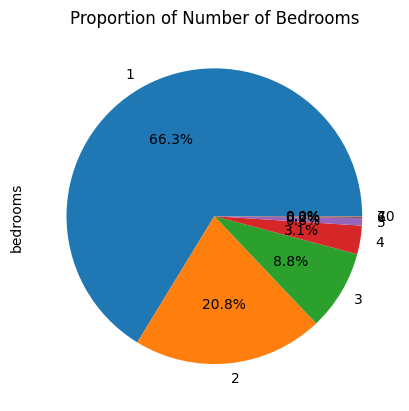

In [4]:
# Count the number of listings by bedroom count
bedroom_counts = df['bedrooms'].value_counts()

# Plot a pie chart of the bedroom counts
bedroom_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the chart title
plt.title('Proportion of Number of Bedrooms')

# Show the chart
plt.show()

Question 2

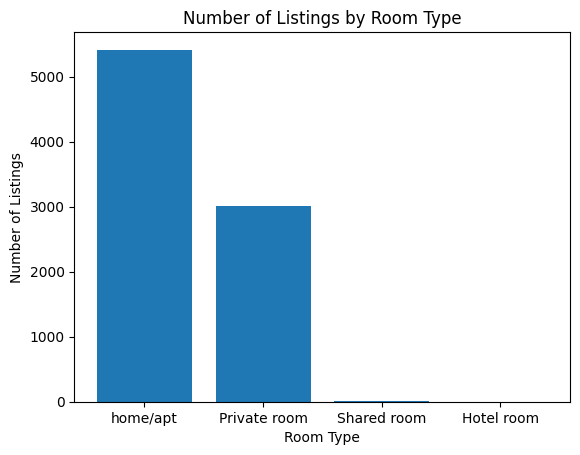

In [5]:
# Count the number of listings for each room type
room_counts = df['room_type'].value_counts()

# Create a bar chart
plt.bar(room_counts.index, room_counts.values)

# Set the chart title and axis labels
plt.title("Number of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")

# Show the chart
plt.show()

Question 3

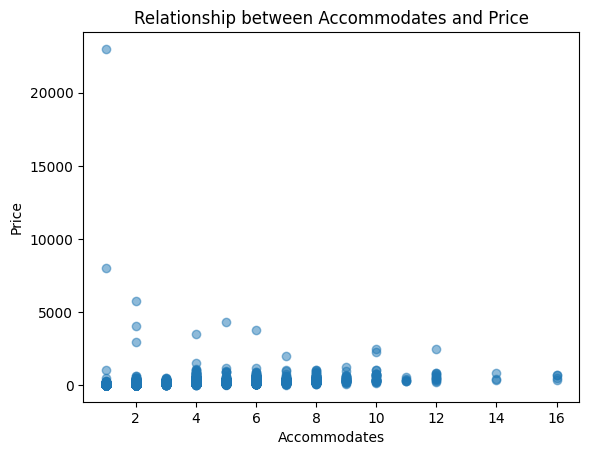

In [6]:
# Retrieve the 'accommodates' and 'price' columns
accommodates = df['accommodates']
price = df['price']

# Create a scatter plot
plt.scatter(accommodates, price, alpha=0.5)

# Add labels and title
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Relationship between Accommodates and Price')

# Display the plot
plt.show()

Question 4

C:\Users\hp\AppData\Local\Temp\ipykernel_15148\2976178503.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


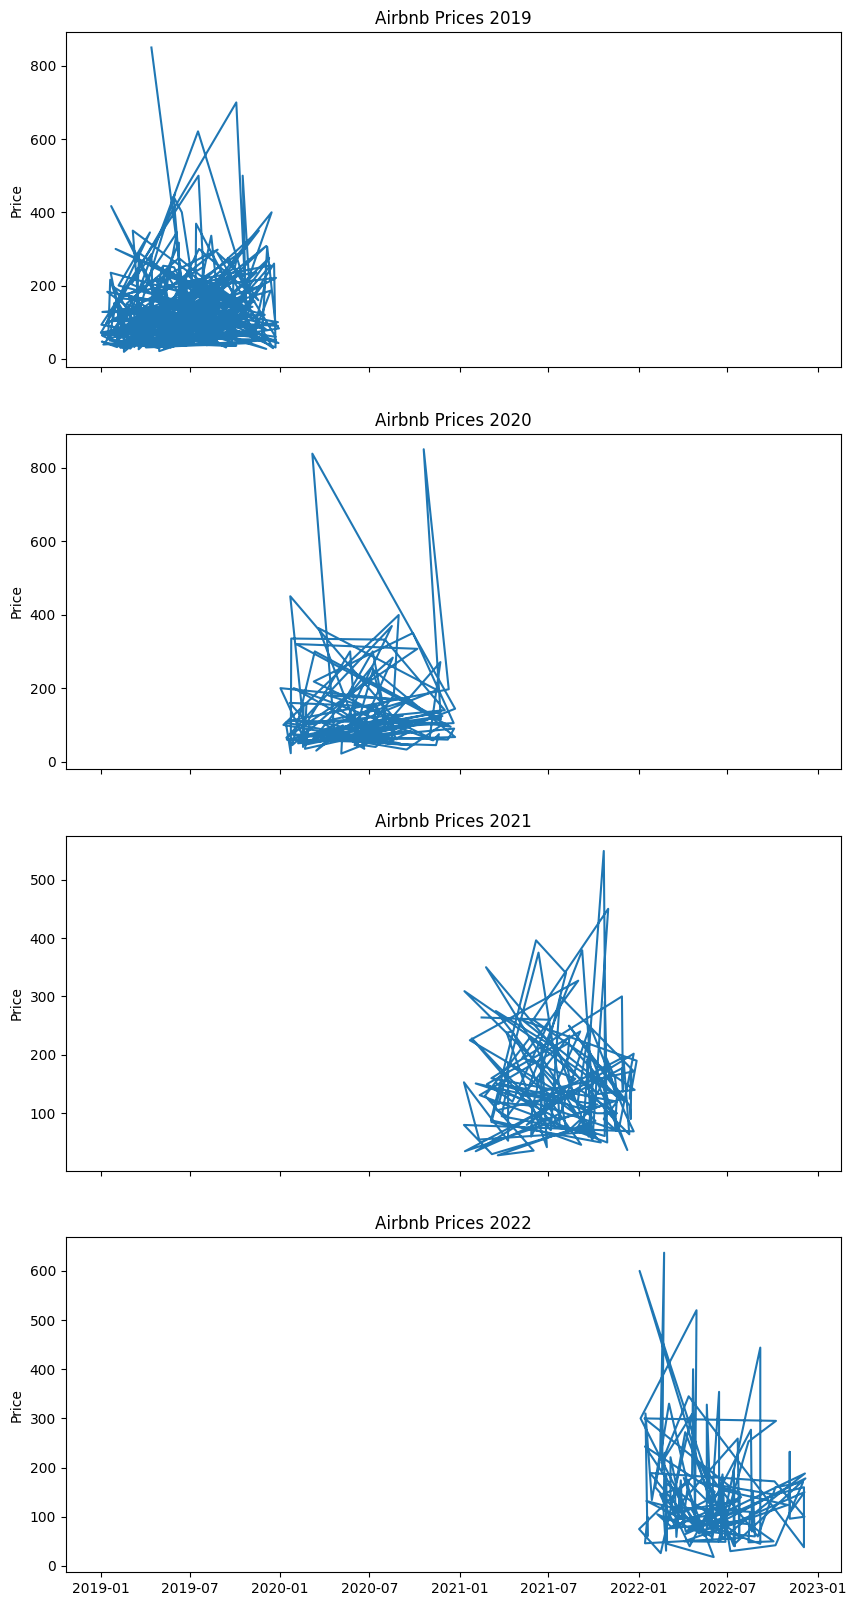

In [8]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df = df[(df['host_since'].dt.year >= 2019) & (df['host_since'].dt.year <= 2022)]
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

years = df['host_since'].dt.year.unique()

for i, year in enumerate(years):
    ax = axs[i]
    df_year = df[df['host_since'].dt.year == year]
    ax.plot(df_year['host_since'], df_year['price'])
    ax.set_ylabel('Price')
    ax.set_title(f'Airbnb Prices {year}')
    
plt.show()


Question 5

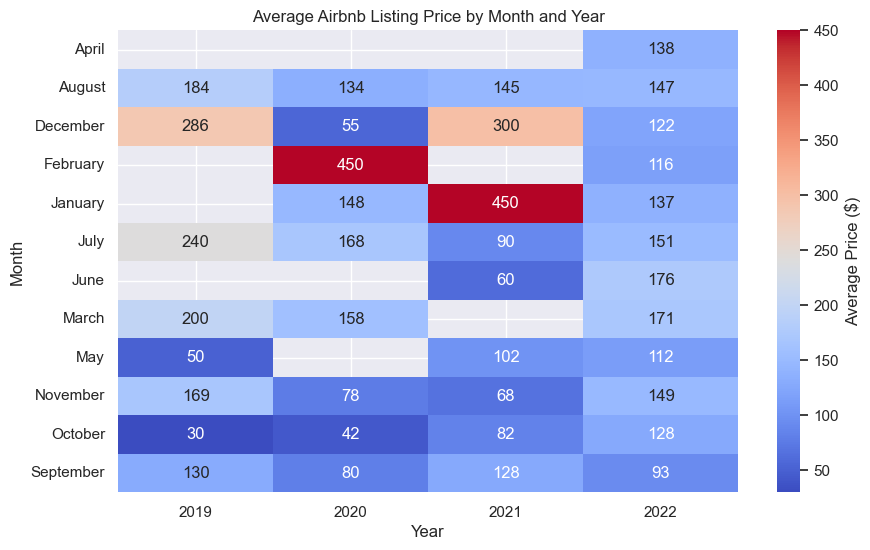

In [9]:
# Convert the 'last_review' column to a datetime object
df['last_review'] = pd.to_datetime(df['last_review'])

# Create a new column for the year and month of each listing's last review
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month_name()

# Create a pivot table to calculate the average price of listings for each month and year
heatmap_data = pd.pivot_table(df, values='price', index='month', columns='year', aggfunc='mean')

# Create the heatmap using Seaborn
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Average Price ($)'})

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Average Airbnb Listing Price by Month and Year')
plt.show()